In [91]:
#ECS 132 Project 
#Justin Guan

import numpy as np
import statistics
from tabulate import tabulate
import random
from tqdm import tqdm

In [130]:
#4.1
string_s = "this is a secret message"
store = ""
for character in string_s:
    store+=bin(ord(character)).replace('b','')
    
print(store)


01110100011010000110100101110011010000001101001011100110100000011000010100000011100110110010101100011011100100110010101110100010000001101101011001010111001101110011011000010110011101100101


     Packet Number        Time
0                 1   0.000000
1                 2   0.001104
2                 3   0.007637
3                 4   0.040841
4                 5   0.119045
..              ...        ...
496             497  50.384480
497             498  50.398880
498             499  50.473850
499             500  50.551120
500             501  50.563660

[501 rows x 2 columns]


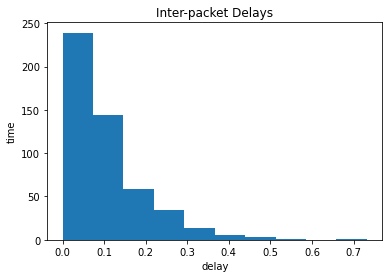

In [93]:
#4.2

file = pd.read_csv (r'C:\Users\14156\Downloads\Traffic_data_orig.csv')
print(file)
data = file.to_numpy()

delay = list()
for i in range(1, len(data)):
    delay.append( data[i][1] - data[i - 1][1])

chart = pd.DataFrame(delay)
plt.hist(chart)
plt.ylabel('time')
plt.xlabel('delay')
plt.title('Inter-packet Delays')

plt.show()


In [94]:
#4.3
x = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]  #A few bits from the secret message in 4.1 
y = []
for i in x:
    if(x[i] == 0):
        y.append(.25)
    else:
        y.append(.75)
print(y)

[0.25, 0.75, 0.75, 0.75, 0.25, 0.75, 0.25, 0.25, 0.25, 0.75, 0.75, 0.25, 0.75]


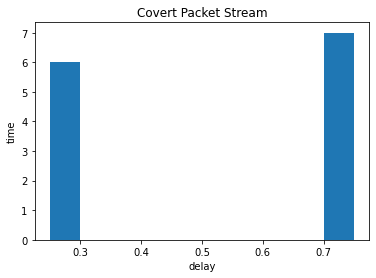

In [95]:
#4.4
x = pd.DataFrame(y)
plt.hist(x)
plt.ylabel('time')
plt.xlabel('delay')
plt.title('Covert Packet Stream')

plt.show()



In [ ]:
#4.4
#Yes Eve will be suspicious because the delay will be very accurate looking at the histogram above.

In [102]:
#4.5

x = pd.DataFrame(delay)
#print(delay)
med = statistics.median(delay)
print("Median:")
print(med)
mini = min(delay)
maxi = max(delay)
print("Minimum:")
print(mini)
print("Maximum:")
print(maxi)


Median:
0.0768999999999993
Minimum:
9.999999996068709e-06
Maximum:
0.7319900000000032


In [103]:
#4.5
temp = []
for i in store:
    temp.append(int(i))
x = temp
y = []
for i in x:
    if(x[i] == 0):
        y.append(random.uniform(mini, med))
    else:
        y.append(random.uniform(med, maxi))
print(y)

[0.02675404812110536, 0.4687593031004226, 0.643709737598558, 0.4878095933399778, 0.060108874160746784, 0.28956610727768184, 0.0019952186592902153, 0.026804491328938057, 0.06620145001404347, 0.19774672521707962, 0.2124219036187089, 0.031712352822460106, 0.5714166413773385, 0.03525831777094317, 0.010658314574839556, 0.052523331766571896, 0.036898524801086, 0.6916137908587305, 0.16063011255274712, 0.03949818772226788, 0.2350559861376586, 0.0006356182350899182, 0.03153461181363766, 0.2786022079180893, 0.07444639671098383, 0.7185531615726367, 0.6017728429892883, 0.1839372494514171, 0.0024420572998748802, 0.021036840128989143, 0.28148844528646805, 0.37043846895073795, 0.0575670108475889, 0.484776556682388, 0.014560884046685202, 0.02792037435369332, 0.0034911947625553908, 0.07094280033331218, 0.06407657757935208, 0.04277065286821867, 0.40654404401633704, 0.2318742100667996, 0.03789609716344621, 0.6860381406116376, 0.04003184155377822, 0.027240202353926407, 0.3679656489222254, 0.00019530147951

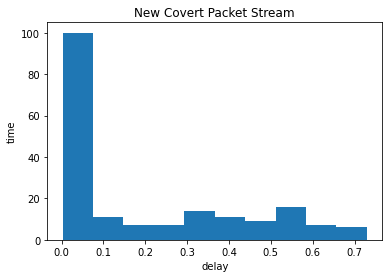

In [97]:
#4.6

x = pd.DataFrame(y)
plt.hist(x)
plt.ylabel('time')
plt.xlabel('delay')
plt.title('New Covert Packet Stream')

plt.show()


In [ ]:
#4.6
#No she will not be suspicious because the graph is similar to the delays shown from the overt packet stream.

In [41]:
#4.7
#1. One way to improve upon the method is by using a normal distribution to get a better representation. 
#   The mean and standard deviation will help make the data and graph more convincing.

#2. This is unrealistic because this will never be able to occur in a real life situation where there is already a call before the process has began.
#3. If there was an alteration on the inter-packet delays, it would disrupt the buffer which would possibly lead to overflows and underflow.
#   A method to mitigate the changes would be to do network routing protocols.

In [146]:
#5
#Exponential
B = 20 #size of buffer
i_array = [2,6,10,14,18] #bits inside buffer
m_array = [16, 32] #message size
table = [["M size", "i", "Underflow", "Overflow", "Success"]]
buffer = [] #buffer array 


for m in m_array:
    message = []
    for i in range(m+B+1):
        message.append(random.randint(0,1)) #initialize the message with random bits that are 0 or 1
    for i in tqdm(i_array):
        bit_send_time = 0 # total bit send time 
        for element in message:
            #exponential constraints 
            median_exponential = statistics.median(np.random.exponential(1, 500)) #added to buffer
            if element == 0:
                delay_time = random.uniform(0, median_exponential)
            elif element == 1:
                delay_time = random.uniform(median_exponential ,5)
            bit_send_time += delay_time
            buffer.append(bit_send_time)
        buffer_size = i
        underflow_count = 0
        overflow_count = 0
        for j in range(500):
            delay_array = []
            bit_generation_array = []
            bit_generation_time = 0
            buffer_send_array = []
            for element in message:
                median_exponential = statistics.median(np.random.exponential(1, 500)) #added to buffer
                if element == 0:
                    delay_time = random.uniform(0, median_exponential)
                elif element == 1:
                    delay_time = random.uniform(median_exponential ,5)
                delay_array.append(delay_time)
                bit_generation_time += delay_time
                bit_generation_array.append(bit_generation_time)
                buffer_send_array.append(delay_time)
            buffer_index = 0 
            generation_index = 0
            break_boolean = True
            
            #while loop that will move bits from generation into buffer and check for overflow/underflow
            while break_boolean and buffer_index < len(buffer) and generation_index < len(bit_generation_array): #while there are elements in the buffer
                if buffer[buffer_index] <= bit_generation_array[generation_index]:
                    buffer_index += 1 #means we sent a message
                    buffer_size -= 1
                    if buffer_size < 0:
                        underflow_count += 1
                        break_boolean = False
                elif buffer[buffer_index] > bit_generation_array[generation_index]:
                    bit_send_time += delay_array[generation_index]
                    buffer.append(bit_send_time)
                    buffer_size += 1
                    generation_index += 1
                    if buffer_size > B:
                        overflow_count += 1
                        break_boolean = False
#       calculate underflow and overflow probabilities
        underflow_prob = underflow_count/ 500
        overflow_prob = overflow_count / 500
        success_rate = 1 - (underflow_prob + overflow_prob)
        table_row = [m, i, underflow_prob, overflow_prob, success_rate]
        table.append(table_row)

print(tabulate(table))

#overflow is when too many packs go into buffer, 
# underflow is when no packets in the buffer, alice needs to keep sending message but cannot

# success is 1-(overflow+underflow)

100%|██████████| 5/5 [00:15<00:00,  3.15s/it]

------  --  ---------  --------  ---------------------
M size  i   Underflow  Overflow  Success
16      2   0.06       0.932     0.008000000000000007
16      6   0.0        0.994     0.006000000000000005
16      10  0.972      0.0       0.028000000000000025
16      14  0.0        1.0       0.0
16      18  0.0        0.998     0.0020000000000000018
32      2   1.0        0.0       0.0
32      6   1.0        0.0       0.0
32      10  0.0        1.0       0.0
32      14  0.996      0.0       0.0040000000000000036
32      18  0.992      0.0       0.008000000000000007
------  --  ---------  --------  ---------------------


In [145]:
#Uniform
B = 20 #size of buffer
i_array = [2,6,10,14,18] #bits inside buffer
m_array = [16, 32] #message size
np.random.exponential(1)
table = [["M size", "i", "Underflow", "Overflow", "Success"]]
buffer = [] #buffer array


for m in m_array:
    message = []
    for i in range(m+B+1):
        message.append(random.randint(0,1)) #initialize the message with random bits that are 0 or 1
    for i in tqdm(i_array):
        bit_send_time = 0 # total bit send time 
        for element in message:
            #exponential constraints 
            delay_time = random.uniform(0,1) #added to buffer
            bit_send_time += delay_time
            buffer.append(bit_send_time)
        buffer_size = i
        underflow_count = 0
        overflow_count = 0
        for j in range(500):
            delay_array = []
            bit_generation_array = []
            bit_generation_time = 0
            buffer_send_array = []
            for element in message:
                delay_time = random.uniform(0,1) #added to buffer
                delay_array.append(delay_time)
                bit_generation_time += delay_time
                bit_generation_array.append(bit_generation_time)
                buffer_send_array.append(delay_time)
            buffer_index = 0 
            generation_index = 0
            break_boolean = True
             #while loop that will move bits from generation into buffer and check for overflow/underflow
            while break_boolean and buffer_index < len(buffer) and generation_index < len(bit_generation_array): #while there are elements in the buffer
                if buffer[buffer_index] <= bit_generation_array[generation_index]:
                    buffer_index += 1 #means we sent a message
                    buffer_size -= 1
                    if buffer_size < 0:
                        underflow_count += 1
                        break_boolean = False
                elif buffer[buffer_index] > bit_generation_array[generation_index]:
                    bit_send_time += delay_array[generation_index]
                    buffer.append(bit_send_time)
                    buffer_size += 1
                    generation_index += 1
                    if buffer_size > B:
                        overflow_count += 1
                        break_boolean = False
#       calculate underflow and overflow probabilities
        underflow_prob = underflow_count/ 500
        overflow_prob = overflow_count / 500
        success_rate = 1 - (underflow_prob + overflow_prob)
        table_row = [m, i, underflow_prob, overflow_prob, success_rate]
        table.append(table_row)
                
print(tabulate(table))

#overflow is when too many packs go into buffer, 
# underflow is when no packets in the buffer, alice needs to keep sending message but cannot

# success is 1-(overflow+underflow)

100%|██████████| 5/5 [00:00<00:00, 62.64it/s]

------  --  ---------  --------  ---------------------
M size  i   Underflow  Overflow  Success
16      2   0.0        0.99      0.010000000000000009
16      6   0.0        0.99      0.010000000000000009
16      10  0.0        0.994     0.006000000000000005
16      14  0.0        0.996     0.0040000000000000036
16      18  0.0        1.0       0.0
32      2   0.002      0.988     0.010000000000000009
32      6   0.0        0.984     0.016000000000000014
32      10  0.142      0.854     0.0040000000000000036
32      14  0.0        1.0       0.0
32      18  0.0        1.0       0.0
------  --  ---------  --------  ---------------------


In [137]:
#5
#A proposed method to deal with overflow and underflow is to increase the buffer size so that it can intake more packets. 
#This will allow the packets to continue running without any issues. 